In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the data



In [2]:
# This data is available at ncdc.noaa.gov

df = pd.read_csv("data-disasters.csv")
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,1980,AK,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0
2,1980,AR,1,1,0,0,0,0,0
3,1980,AZ,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0


### Create a new column

In [3]:
df.columns

Index(['year', 'state', 'drought', 'flooding', 'freeze', 'severe storm',
       'tropical cyclone', 'wildfire', 'winter storm'],
      dtype='object')

In [4]:
df['Total'] = df['drought'] + df['flooding'] + df['freeze'] + df['severe storm'] + df['tropical cyclone'] + df['wildfire'] + df['winter storm']

In [5]:
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Total
0,1980,AK,0,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0,1
2,1980,AR,1,1,0,0,0,0,0,2
3,1980,AZ,0,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0,0


# Most Affected States

### Find the top 10 states by billion dollar disaster events

In [8]:
total = df.groupby(['state'])['Total'].sum()
total.head()

state
AK     6
AL    69
AR    57
AZ    22
CA    33
Name: Total, dtype: int64

In [9]:
top10states = total.sort_values(ascending=False).head(10)
print(top10states)

state
TX    95
OK    70
IL    70
AL    69
NC    68
GA    68
MS    66
TN    66
MO    64
VA    60
Name: Total, dtype: int64


### Plot the top 10 states

Text(0, 0.5, '# of Billion Dollar Events')

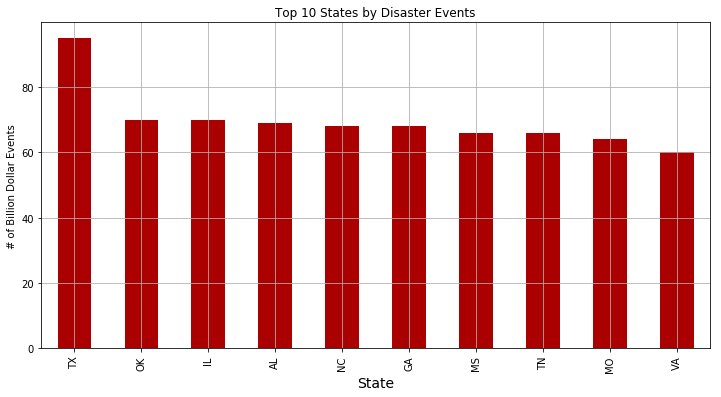

In [10]:
plt.figure(figsize=(12,6))
chart = top10states.plot(kind = "bar", facecolor="#AA0000", title="Top 10 States by Disaster Events", grid=True)
chart.set_xlabel('State', fontsize=14)
chart.set_ylabel('# of Billion Dollar Events')

### Billion dollar events over the years

In [11]:
total = df.groupby(['year'])['Total'].sum()
total.head(10)

year
1980    26
1981     5
1982    68
1983    65
1984    17
1985    51
1986    14
1987     0
1988    25
1989    49
Name: Total, dtype: int64

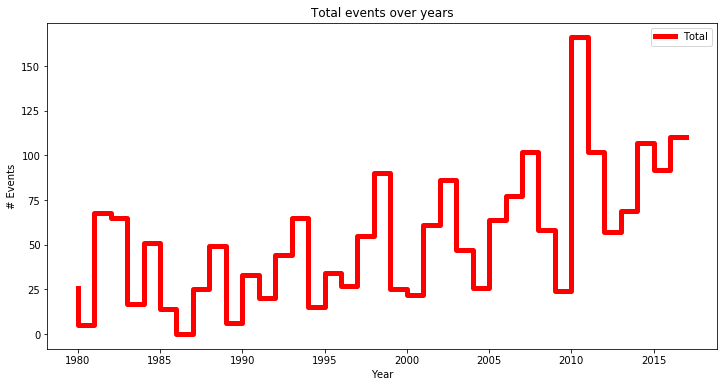

In [14]:
plt.figure(figsize=(12,6))
plt.plot(total, color='red', linewidth=5, linestyle='steps')
plt.xlabel('Year')
plt.ylabel('# Events')
plt.title('Total events over years')
plt.legend()
plt.show;

# Least Affected States

In [15]:
total = df.groupby(['state'])['Total'].sum()
bot10states = total.sort_values(ascending=True).head(10)
bot10states

state
HI     1
VI     5
AK     6
PR     6
ME    13
VT    14
UT    15
NH    15
ND    16
NV    17
Name: Total, dtype: int64

### Plot the least affected States

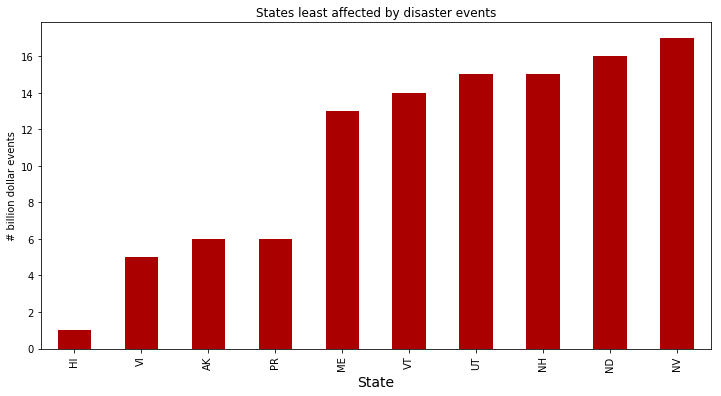

In [16]:
plt.figure(figsize=(12,6))
chart = bot10states.plot(kind = "bar", facecolor="#AA0000", title = 'States least affected by disaster events')
chart.set_xlabel('State', fontsize=14)
chart.set_ylabel('# billion dollar events');

### Plotting a stacked bar plot to visualize the various kinds of disasters

In [17]:
total_by_state = df.groupby(['state'])['drought', 'flooding', 'freeze', 'severe storm',
                                       'tropical cyclone', 'wildfire', 'winter storm', 'Total'].sum()
least = total_by_state.sort_values('Total').head(10)
print(least)

       drought  flooding  freeze  severe storm  tropical cyclone  wildfire  \
state                                                                        
HI           0         0       0             0                 1         0   
VI           0         0       0             0                 5         0   
AK           0         0       0             0                 0         6   
PR           0         0       0             0                 6         0   
ME           1         0       0             2                 2         0   
VT           1         0       0             3                 3         0   
UT           6         1       1             0                 0         7   
NH           1         0       0             3                 4         0   
ND          10         3       1             0                 0         1   
NV           6         1       0             1                 0         9   

       winter storm  Total  
state                       
HI   

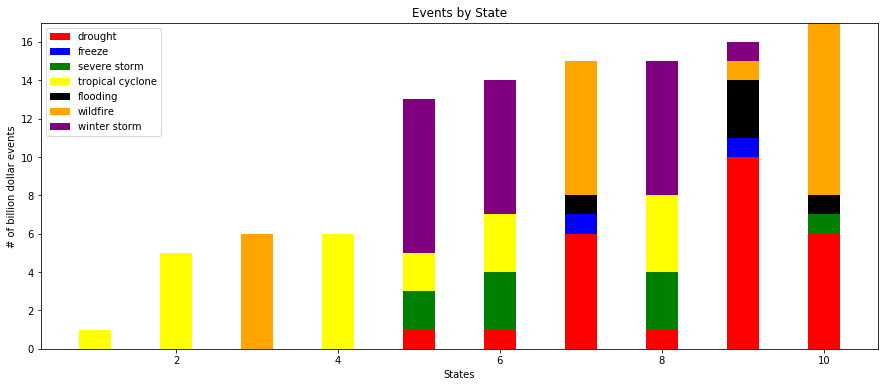

In [20]:
f, ax = plt.subplots(1, figsize=(15,6))

bar_1 = [i+1 for i in range(len(least['drought']))]

ax.bar(bar_1, least['drought'], label='drought', color='red', width=0.4)

ax.bar(bar_1, least['freeze'], bottom=least['drought'], label='freeze', color='blue', width=0.4)

ax.bar(bar_1, least['severe storm'], bottom=[i+j for i,j in zip(least['drought'], least['freeze'])], 
       label='severe storm', color='green', width=0.4)

ax.bar(bar_1, least['tropical cyclone'], bottom=[i+j+k for i,j,k in zip(least['drought'], least['freeze'], least['severe storm'])], 
       label='tropical cyclone', color='yellow', width=0.4)

ax.bar(bar_1, least['flooding'], bottom=[i+j+k+l for i,j,k,l in zip(least['drought'], least['freeze'], least['severe storm'], least['tropical cyclone'])], 
       label='flooding', color='black', width=0.4)

ax.bar(bar_1, least['wildfire'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(least['drought'], least['freeze'], least['severe storm'], least['tropical cyclone'], least['flooding'])], 
       label='wildfire', color='orange', width=0.4)

ax.bar(bar_1, least['winter storm'], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(least['drought'], least['freeze'], least['severe storm'], least['tropical cyclone'], least['flooding'], least['wildfire'])], 
       label='winter storm', color='purple', width=0.4)

ax.set_title("Events by State")
ax.set_xlabel("States")
ax.set_ylabel("# of billion dollar events")
plt.legend(loc='upper left')